넘파이, 판다스, 시본, 맷플로립, 그리고 워닝에 대한 부분까지 불러온다. 
그리고 데이터 불러 온다. 

In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

iris_data = pd.read_csv('./iris/iris(150).csv')
# bike_df = pd.read_csv('./bike/train_bike.csv')
# iris_data = load_iris()
# print(iris_data.shape)
iris_data.head()
# print(type(iris_data))
# iris = pd.DataFrame(iris_data)
# iris
# print(bike_df.shape)
# bike_df.head()



,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [50]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   caseno       150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [14]:
bike_df["datetime"] = bike_df.datetime.apply(pd.to_datetime) 
bike_df["year"] = bike_df.datetime.apply(lambda x : x.year)
bike_df["month"] = bike_df.datetime.apply(lambda x : x.month) 
bike_df["day"] = bike_df.datetime.apply(lambda x : x.day) 
bike_df["hour"] = bike_df.datetime.apply(lambda x : x.hour) 
bike_df.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [18]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산 
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    #MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print("RMSLE: {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val, rmse_val, mae_val))
    print(f'RMSLE: {rmsle_val:.3f}, RMSE : {rmse_val:.3f}, MAE : {mae_val:.3f}')



In [105]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit(iris_data.Species)
le.fit(iris_data['Species'])

# le_1 = le.transform(iris_data.Species)
le_1 = le.transform(iris_data['Species'])
le_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [103]:
iris_data['labels'] = le_1
iris_data

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,labels
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = iris_data['labels']
X_features = iris_data.drop(['labels', 'Species'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

# print(y_train)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)



RMSLE: 0.105, RMSE : 0.180, MAE : 0.149
RMSLE: 0.105, RMSE : 0.180, MAE : 0.149


In [106]:
# 실제값과 예측 값이 어느 정도 차이가 나는지 DF의 칼럼으로 만들어서 오류 값이 가장 큰 순으로 5개 확인 

def get_top_error_data(y_test, pred, n_tops = 5):
    #DF의 칼럼으로 실제 대여 횟수(Count)와 예측값을 서로 비교할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    #예측값과 실제 값이 가장 큰 데이터 순으로 출력 
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 5)

    real_count  predicted_count  diff
0            2              2.0   0.0
23           0             -0.0   0.0
25           0             -0.0   0.0
26           0              0.0   0.0
27           1              1.0   0.0


<AxesSubplot:>

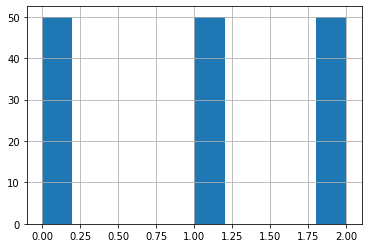

In [107]:
 y_target.hist()
 
 #리니어 리그레션은 정규화상태에서 예측률이 높다. 

<AxesSubplot:>

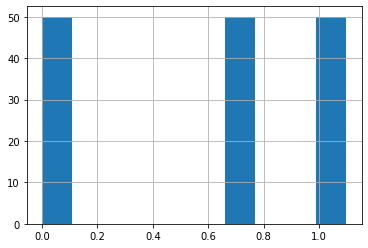

In [108]:
y_log_transform =  np.log1p(y_target)
y_log_transform.hist()

In [109]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환 
y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/ 테스트 데이터 세트 분할 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환 
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로, 다시 expm1로 스케일 변환 
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 0.072, RMSE : 0.147, MAE : 0.110
RMSLE: 0.072, RMSE : 0.147, MAE : 0.110


<AxesSubplot:>

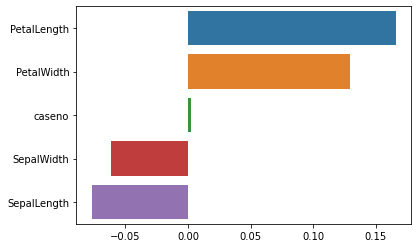

In [110]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x= coef_sort.values, y = coef_sort.index)

In [111]:
# 'year' ,'month','day','hour' 등의 피처를 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns = ['year','month','day','hour','holiday','workingday','season','weather'])

KeyError: "None of [Index(['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season',\n       'weather'],\n      dtype='object')] are in the [columns]"

In [112]:
#원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state = 0)

#모델과 학습/ 테스트 데이터 세트를 입력하면 성능 평가 수치를 반환 
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print("###", model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)
#end of function get_model_predict

# 모델별로 평가 수행 
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

ValueError: Found input variables with inconsistent numbers of samples: [10886, 150]

In [113]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending= False)[:10]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

ValueError: Length of values (5) does not match length of index (73)

In [114]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행 
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)


for model in [rf_reg, gbm_reg]:
    # XGBoost의 경우 DF이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환 
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1= True)

### RandomForestRegressor ###
RMSLE: 0.043, RMSE : 0.112, MAE : 0.019
RMSLE: 0.043, RMSE : 0.112, MAE : 0.019
### GradientBoostingRegressor ###
RMSLE: 0.060, RMSE : 0.149, MAE : 0.022
RMSLE: 0.060, RMSE : 0.149, MAE : 0.022


In [70]:
import pandas as pd

In [69]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [71]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [72]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [74]:
y= df['body_shape']
X = df.drop(['body_shape'], axis = 1)

In [75]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [76]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

# Covariance Matrix of Features 공분산



In [77]:
import numpy as np

features = x_std.T
coverian_matrix = np.cov(features)
coverian_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

# 고유벡터 (eigenvector)와 고유값 with  공분산 행렬


In [78]:
eig_vals, eig_vecs = np.linalg.eig(coverian_matrix)

In [79]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [80]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [81]:
eig_vecs[0]

array([-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985])

In [82]:
sum(eig_vals)

5.555555555555557

In [84]:
eig_vals[0] / sum(eig_vals)

0.7318321731427543

# project data into selected eigen vector

In [88]:
#행렬과 행렬을 곱하면 선형변환이 됨
# 
projected_x =  x_std.dot(eig_vecs.T[0]) 

In [91]:
result = pd.DataFrame(projected_x, columns= ['PC1'])
result['y-axis'] = 0.0
result['label'] = y

In [92]:
result.head()

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'PCA result')

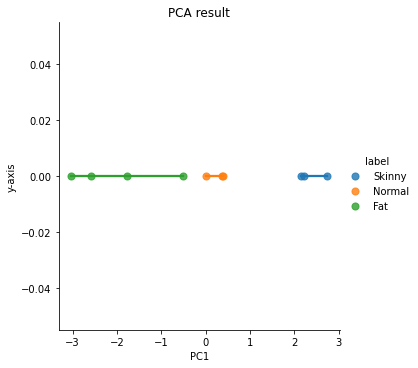

In [96]:
sns.lmplot('PC1', 'y-axis', data = result, scatter_kws = {'s':50}, hue = 'label')
plt.title('PCA result')

# Sklearn PCA 라이브러리 이용


In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components= 1)

In [99]:
pca_x = pca.fit_transform(x_std)
pca_x


array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

Text(0.5, 1.0, 'PCA result')

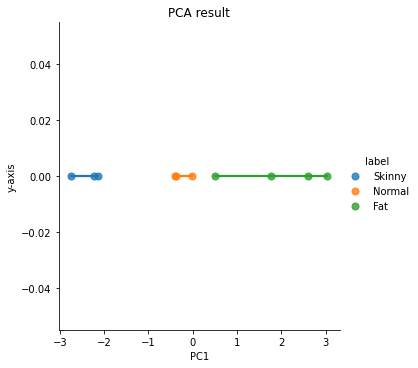

In [100]:
result = pd.DataFrame(pca_x, columns= ['PC1'])
result['y-axis'] = 0.0
result['label'] = y

sns.lmplot('PC1', 'y-axis', data = result, scatter_kws = {'s':50}, hue = 'label')
plt.title('PCA result')